0.211525 0.211525 0.438647
[-0.4464852837932793, -0.5380444483069591, -0.5766310470254981, -0.5766310470254982, -0.5380444483069591, -0.4464852837932792, -0.32282666898417534, -0.3577905039045061, -0.34807360873393406, -0.3480736087339341, -0.3577905039045061, -0.32282666898417545, -0.1153262094050996, -0.11602453624464465, -0.10228819968305575, -0.10228819968305572, -0.11602453624464464, -0.1153262094050996, 0.11532620940509959, 0.11602453624464472, 0.10228819968305586, 0.10228819968305582, 0.11602453624464468, 0.11532620940509963, 0.32282666898417545, 0.3577905039045061, 0.3480736087339341, 0.3480736087339341, 0.3577905039045061, 0.32282666898417534, 0.4464852837932793, 0.5380444483069589, 0.5766310470254982, 0.5766310470254981, 0.5380444483069591, 0.4464852837932793] [-0.4464852837932793, -0.32282666898417545, -0.1153262094050977, 0.1153262094050977, 0.32282666898417545, 0.4464852837932793, -0.538044448306959, -0.3577905039045062, -0.11602453624464469, 0.11602453624464483, 0.3577905

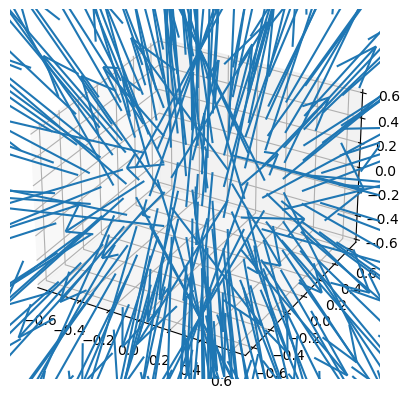

In [12]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

a = 0.5

def componenteX(x,y,z):
    #Se definen las funciones para cada una de las componentes del campo electrico
    Ex = lambda f : (x-a*np.cos(f))/((x**2)+(y**2)+(z**2)+(a**2)-(2*a*x*np.cos(f))-(2*a*y*np.sin(f)))**1.5
    
    #Se calculan las componentes por separado y se agregan a una lista para organizarlas
    
    Ex1 = integrate.quad(Ex, 0, 2*np.pi)
    Ex1 = Ex1[0]/(2*np.pi)
    return Ex1

def componenteY(x,y,z):
    #Se definen las funciones para cada una de las componentes del campo electrico
    Ey = lambda f : (y-a*np.sin(f))/((x**2)+(y**2)+(z**2)+(a**2)-(2*a*x*np.cos(f))-(2*a*y*np.sin(f)))**1.5

    
    #Se calculan las componentes por separado y se agregan a una lista para organizarlas

    Ey1 = integrate.quad(Ey, 0, 2*np.pi)
    Ey1 = Ey1[0]/(2*np.pi)
    
    return Ey1

def componenteZ(x,y,z):
    #Se definen las funciones para cada una de las componentes del campo electrico

    Ez = lambda f : (z)/((x**2)+(y**2)+(z**2)+(a**2)-(2*a*x*np.cos(f))-(2*a*y*np.sin(f)))**1.5
    
    #Se calculan las componentes por separado y se agregan a una lista para organizarlas
    
    Ez1 = integrate.quad(Ez, 0, 2*np.pi)
    Ez1 = Ez1[0]/(2*np.pi)
    
    return Ez1

#Se comprueba que las integrales estén bien

xp = componenteX(0.6,0.6,1)
yp = componenteY(0.6,0.6,1)
zp = componenteZ(0.6,0.6,1)

print(round(xp,6),round(yp,6),round(zp,6))



N = 6


x=np.linspace(-0.6,0.6,N)
y=np.linspace(-0.6,0.6,N)
z=np.linspace(-0.6,0.6,N)

X = []
Y = []
Z = []

Ex = np.zeros((N,N,N))
Ey = np.zeros((N,N,N))
Ez = np.zeros((N,N,N))

for i in range(0, len(x)):
    for j in range(0,len(y)):
        for k in range(0,len(z)):
            xi = componenteX(x[i],y[j],z[k])
            X.append(xi)
            Ex[i][j][k] = xi
            yi = componenteY(x[i],y[j],z[k])
            Y.append(yi)
            Ey[i][j][k] = yi
            zi = componenteZ(x[i],y[j],z[k])
            Z.append(zi)
            Ez[i][j][k] = zi

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0, N):
    for j in range(0,N):
        for k in range(0,N):
            ax.quiver(x[i],y[j],z[k],Ex[i,j,k],Ey[i,j,k],Ez[i,j,k])
            
            
#Se calcula Ex para z=0.6

Ex6 = []
for i in range(0,len(Ex)):
    for j in range(0,len(Ex[0])):
        Ex6.append(Ex[i][j][0])

Ey6 = []
for i in range(0,len(Ey)):
    for j in range(0,len(Ey[0])):
        Ey6.append(Ey[i][j][0])
        
print(Ex6,Ey6)